In [27]:
%run clustering.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

%matplotlib inline

## Conjoint Triad Method

In [30]:
df = pd.read_csv("../data/train_cleaned.csv")

In [31]:
df = apply_clusters(df)

In [32]:
df["seq_vec"] = df[["seq1_clusters","seq2_clusters"]].values.tolist()

In [33]:
vec = DictVectorizer()

In [34]:
vec.fit(df.loc[0,"seq_vec"])
df["seq_vec"] = df["seq_vec"].apply(vec.transform)

In [35]:
df["seq_vec"] = df["seq_vec"].apply(lambda a: a.toarray())

In [36]:
df.to_csv("../data/train_conjoin.csv", index=False)

In [ ]:
features = "seq_vec"
target = "interacts"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [87]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [88]:
model = Sequential()

model.add(Flatten(input_shape=(2,343)))

model.add(Dense(100,
                activation="relu"
               ))

model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 686)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               68700     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 68,801
Trainable params: 68,801
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [90]:
history = model.fit(x=X_train, y=y_train, epochs=10, batch_size=512,
                    validation_data=(X_test,y_test)
                   )

Train on 86063 samples, validate on 28688 samples
Epoch 1/10
86063/86063 [==============================] - 2s 24us/sample - loss: 0.7069 - acc: 0.6026 - val_loss: 0.6273 - val_acc: 0.6466
Epoch 2/10
86063/86063 [==============================] - 1s 11us/sample - loss: 0.6146 - acc: 0.6599 - val_loss: 0.6231 - val_acc: 0.6503
Epoch 3/10
86063/86063 [==============================] - 1s 10us/sample - loss: 0.5840 - acc: 0.6878 - val_loss: 0.6061 - val_acc: 0.6830
Epoch 4/10
86063/86063 [==============================] - 1s 10us/sample - loss: 0.5604 - acc: 0.7076 - val_loss: 0.5984 - val_acc: 0.6920
Epoch 5/10
86063/86063 [==============================] - 1s 11us/sample - loss: 0.5414 - acc: 0.7245 - val_loss: 0.5942 - val_acc: 0.6956
Epoch 6/10
86063/86063 [==============================] - 1s 11us/sample - loss: 0.5174 - acc: 0.7420 - val_loss: 0.5479 - val_acc: 0.7177
Epoch 7/10
86063/86063 [==============================] - 1s 11us/sample - loss: 0.5017 - acc: 0.7547 - val_loss: 0.

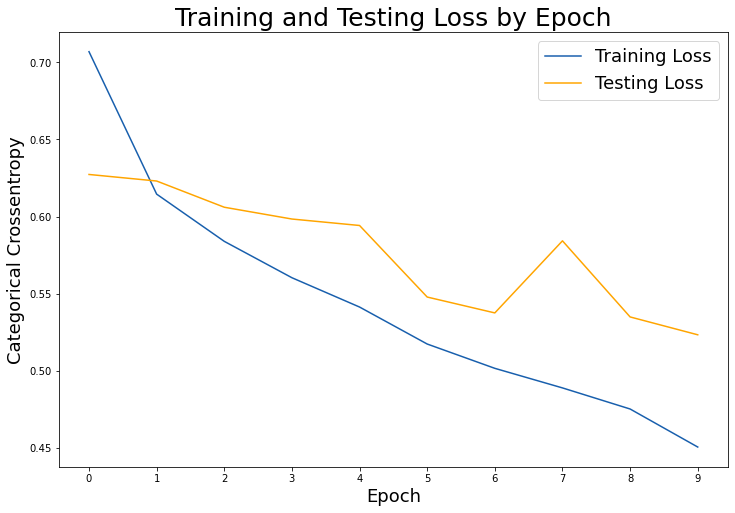

In [91]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [1]:
# Instantiate a CNN.
cnn_model = Sequential()

# Add a convolutional layer.
cnn_model.add(Conv2D(filters=16,             # number of filters
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(2,343))) # shape of input (image)

# Add a pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
cnn_model.add(Dropout(0.5))

# Add a final layer with 10 neurons.
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

NameError: name 'Sequential' is not defined